# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [131]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

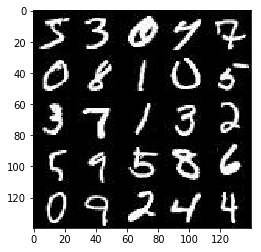

In [9]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

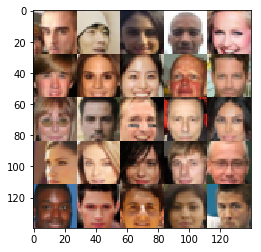

In [10]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [106]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    #real input
    print("Input Stage")
    real_in = tf.placeholder(tf.float32, (None,image_width, image_height, image_channels))
    #z-data
    z_in = tf.placeholder(tf.float32, (None, z_dim))
    # learning rate
    lr = tf.placeholder(tf.float32)

    return real_in, z_in, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Input Stage
Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [107]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        print("disciminator stage")
        #Input image:28*28*3
        in1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(in1*alpha, in1)
        #input image:14*14*64
        print(in1.shape)
        
        in2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(in2, training=True)
        relu2 = tf.maximum(bn2*alpha, bn2)
        #input image:7*7*256
        print(in2.shape)
        
        """       
        in3 = tf.layers.conv2d(relu2, 256, 5, strides=1, padding='same')
        bn3 = tf.layers.batch_normalization(in2, training=True)
        relu3 = tf.maximum(bn3*alpha, bn3)
        print(in3.shape)
        """
        
        #Flatten 
        flat = tf.reshape(relu2, (-1, 7*7*128))
        logits_dis = tf.layers.dense(flat,1)
        out_dis = tf.sigmoid(logits_dis)
        #print(out_dis.shape,out_dis, logits_dis.shape, logits_dis)
        return out_dis, logits_dis


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

disciminator stage
(?, 14, 14, 64)
(?, 7, 7, 128)
disciminator stage
(?, 14, 14, 64)
(?, 7, 7, 128)
Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [108]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse= not is_train):
        print("Generator Stage")
        # fully connected layer
        in0 = tf.layers.dense(z, 7*7*128)
        #print(in0.shape)
        
        # start tof convolution track.
        in1 = tf.reshape(in0, (-1, 7,7,128))
        bn1 = tf.layers.batch_normalization(in1, training=True)
        relu1 = tf.maximum(bn1*alpha, bn1)
        #print(in1.shape)
        # image shape: 7*7*128
        
        in2 = tf.layers.conv2d_transpose(relu1, 64, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(in2, training=True)
        relu2 = tf.maximum(bn2*alpha, bn2)
        #print(in2.shape)
        # image shape: 14*14*64
        
        logits_gen = tf.layers.conv2d_transpose(relu2, out_channel_dim, 5, strides=2, padding='same')
        # image shape: 28*28*out_channel_dim  
        out_gen = tf.tanh(logits_gen)
        print(out_gen.shape)
        
    return out_gen


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Generator Stage
(?, 28, 28, 5)
Generator Stage
(?, 28, 28, 5)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [109]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    #model outputs
    g_logits = generator(input_z, out_channel_dim)
    d_out_real, d_logits_real = discriminator(input_real)
    d_out_fake, d_logits_fake = discriminator(g_logits, reuse=True)
    
    #loss
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_out_fake)))
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_out_real)))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_out_fake)))
    
    #total loss
    d_loss_total = d_loss_real+d_loss_fake
    g_loss_total = g_loss
    
    return d_loss_total, g_loss_total


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Generator Stage
(?, 28, 28, 4)
disciminator stage
(?, 14, 14, 64)
(?, 7, 7, 128)
disciminator stage
(?, 14, 14, 64)
(?, 7, 7, 128)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [116]:

def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [117]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [124]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Input Stage
Generator Stage
(?, 28, 28, 1)
disciminator stage
(?, 14, 14, 64)
(?, 7, 7, 128)
disciminator stage
(?, 14, 14, 64)
(?, 7, 7, 128)
Epoch 1/2... Discriminator Loss: 0.0227... Generator Loss: 4.6457
Epoch 1/2... Discriminator Loss: 0.5893... Generator Loss: 7.5714
Epoch 1/2... Discriminator Loss: 0.1759... Generator Loss: 3.3966
Epoch 1/2... Discriminator Loss: 1.1962... Generator Loss: 0.5291
Epoch 1/2... Discriminator Loss: 0.6598... Generator Loss: 1.3009
Epoch 1/2... Discriminator Loss: 1.0593... Generator Loss: 1.3393
Epoch 1/2... Discriminator Loss: 1.5500... Generator Loss: 0.3241
Epoch 1/2... Discriminator Loss: 1.0791... Generator Loss: 2.7664
Epoch 1/2... Discriminator Loss: 1.2337... Generator Loss: 1.9461
Epoch 1/2... Discriminator Loss: 1.1233... Generator Loss: 1.5400
Generator Stage
(?, 28, 28, 1)


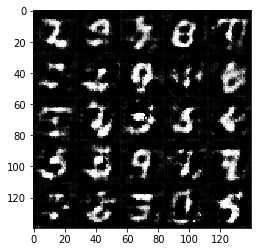

Epoch 1/2... Discriminator Loss: 1.4471... Generator Loss: 1.8856
Epoch 1/2... Discriminator Loss: 1.2109... Generator Loss: 0.6468
Epoch 1/2... Discriminator Loss: 1.5499... Generator Loss: 0.8601
Epoch 1/2... Discriminator Loss: 1.3215... Generator Loss: 0.6153
Epoch 1/2... Discriminator Loss: 1.5150... Generator Loss: 1.9798
Epoch 1/2... Discriminator Loss: 1.4739... Generator Loss: 0.5161
Epoch 1/2... Discriminator Loss: 1.2007... Generator Loss: 0.8778
Epoch 1/2... Discriminator Loss: 1.3805... Generator Loss: 0.8454
Epoch 1/2... Discriminator Loss: 1.1720... Generator Loss: 0.5134
Epoch 1/2... Discriminator Loss: 1.4280... Generator Loss: 1.6254
Generator Stage
(?, 28, 28, 1)


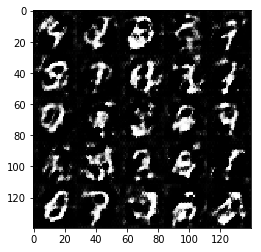

Epoch 1/2... Discriminator Loss: 1.4512... Generator Loss: 1.8474
Epoch 1/2... Discriminator Loss: 1.2033... Generator Loss: 1.6802
Epoch 1/2... Discriminator Loss: 1.2801... Generator Loss: 0.5433
Epoch 1/2... Discriminator Loss: 1.1838... Generator Loss: 0.5800
Epoch 1/2... Discriminator Loss: 1.0280... Generator Loss: 1.1008
Epoch 1/2... Discriminator Loss: 0.9349... Generator Loss: 1.6568
Epoch 1/2... Discriminator Loss: 0.9551... Generator Loss: 1.5487
Epoch 1/2... Discriminator Loss: 1.7941... Generator Loss: 0.2533
Epoch 1/2... Discriminator Loss: 1.2798... Generator Loss: 0.4731
Epoch 1/2... Discriminator Loss: 1.3340... Generator Loss: 0.4513
Generator Stage
(?, 28, 28, 1)


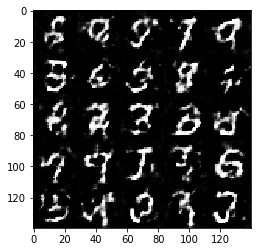

Epoch 1/2... Discriminator Loss: 1.0970... Generator Loss: 0.5446
Epoch 1/2... Discriminator Loss: 1.1866... Generator Loss: 0.5977
Epoch 1/2... Discriminator Loss: 1.2114... Generator Loss: 1.8387
Epoch 1/2... Discriminator Loss: 1.1293... Generator Loss: 0.6036
Epoch 1/2... Discriminator Loss: 0.9534... Generator Loss: 1.4588
Epoch 1/2... Discriminator Loss: 1.1499... Generator Loss: 0.6692
Epoch 1/2... Discriminator Loss: 1.7778... Generator Loss: 3.0403
Epoch 1/2... Discriminator Loss: 0.9247... Generator Loss: 1.0706
Epoch 1/2... Discriminator Loss: 1.2843... Generator Loss: 0.5134
Epoch 1/2... Discriminator Loss: 1.1759... Generator Loss: 0.5574
Generator Stage
(?, 28, 28, 1)


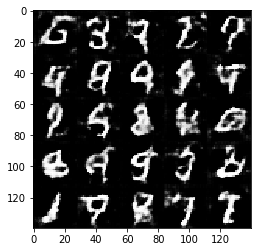

Epoch 1/2... Discriminator Loss: 1.0666... Generator Loss: 1.8155
Epoch 1/2... Discriminator Loss: 1.2854... Generator Loss: 0.4480
Epoch 1/2... Discriminator Loss: 1.2057... Generator Loss: 1.5573
Epoch 1/2... Discriminator Loss: 1.0078... Generator Loss: 0.7629
Epoch 1/2... Discriminator Loss: 1.2051... Generator Loss: 0.6434
Epoch 1/2... Discriminator Loss: 1.1834... Generator Loss: 0.7376
Epoch 2/2... Discriminator Loss: 1.4877... Generator Loss: 0.4192
Epoch 2/2... Discriminator Loss: 1.2031... Generator Loss: 1.7623
Epoch 2/2... Discriminator Loss: 1.0988... Generator Loss: 2.1984
Epoch 2/2... Discriminator Loss: 1.0956... Generator Loss: 0.6630
Generator Stage
(?, 28, 28, 1)


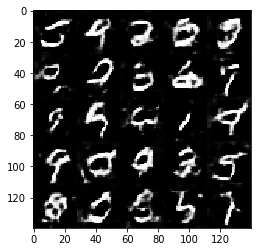

Epoch 2/2... Discriminator Loss: 0.7411... Generator Loss: 1.5747
Epoch 2/2... Discriminator Loss: 1.3125... Generator Loss: 0.4662
Epoch 2/2... Discriminator Loss: 1.3216... Generator Loss: 0.7263
Epoch 2/2... Discriminator Loss: 1.0485... Generator Loss: 1.3773
Epoch 2/2... Discriminator Loss: 1.0995... Generator Loss: 0.8557
Epoch 2/2... Discriminator Loss: 1.1572... Generator Loss: 1.2513
Epoch 2/2... Discriminator Loss: 1.2141... Generator Loss: 1.4707
Epoch 2/2... Discriminator Loss: 1.3979... Generator Loss: 2.0005
Epoch 2/2... Discriminator Loss: 1.7717... Generator Loss: 0.2681
Epoch 2/2... Discriminator Loss: 0.9480... Generator Loss: 0.9416
Generator Stage
(?, 28, 28, 1)


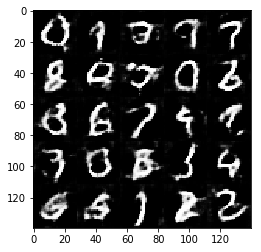

Epoch 2/2... Discriminator Loss: 1.1575... Generator Loss: 0.7183
Epoch 2/2... Discriminator Loss: 1.2548... Generator Loss: 0.7473
Epoch 2/2... Discriminator Loss: 1.2732... Generator Loss: 1.2528
Epoch 2/2... Discriminator Loss: 1.1569... Generator Loss: 0.7983
Epoch 2/2... Discriminator Loss: 1.0089... Generator Loss: 0.8452
Epoch 2/2... Discriminator Loss: 1.2126... Generator Loss: 0.7403
Epoch 2/2... Discriminator Loss: 1.6022... Generator Loss: 1.1293
Epoch 2/2... Discriminator Loss: 1.3100... Generator Loss: 1.8183
Epoch 2/2... Discriminator Loss: 1.1664... Generator Loss: 1.2417
Epoch 2/2... Discriminator Loss: 1.2487... Generator Loss: 0.9497
Generator Stage
(?, 28, 28, 1)


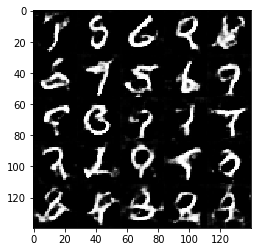

Epoch 2/2... Discriminator Loss: 1.3355... Generator Loss: 0.4784
Epoch 2/2... Discriminator Loss: 1.2205... Generator Loss: 1.2272
Epoch 2/2... Discriminator Loss: 1.3591... Generator Loss: 0.5469
Epoch 2/2... Discriminator Loss: 1.0250... Generator Loss: 1.0504
Epoch 2/2... Discriminator Loss: 1.1672... Generator Loss: 0.8536
Epoch 2/2... Discriminator Loss: 1.2057... Generator Loss: 0.7193
Epoch 2/2... Discriminator Loss: 1.1238... Generator Loss: 0.9823
Epoch 2/2... Discriminator Loss: 1.5171... Generator Loss: 0.3539
Epoch 2/2... Discriminator Loss: 1.4045... Generator Loss: 0.4226
Epoch 2/2... Discriminator Loss: 1.2346... Generator Loss: 1.2991
Generator Stage
(?, 28, 28, 1)


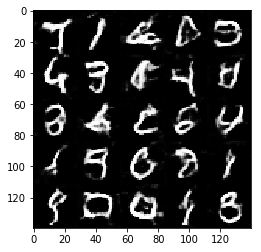

Epoch 2/2... Discriminator Loss: 1.2298... Generator Loss: 0.6752
Epoch 2/2... Discriminator Loss: 1.3598... Generator Loss: 1.4928
Epoch 2/2... Discriminator Loss: 1.0543... Generator Loss: 0.8140
Epoch 2/2... Discriminator Loss: 1.1023... Generator Loss: 0.7444
Epoch 2/2... Discriminator Loss: 1.2101... Generator Loss: 0.5698
Epoch 2/2... Discriminator Loss: 1.1724... Generator Loss: 1.1611
Epoch 2/2... Discriminator Loss: 1.3824... Generator Loss: 1.1711
Epoch 2/2... Discriminator Loss: 1.1967... Generator Loss: 1.5877
Epoch 2/2... Discriminator Loss: 1.2085... Generator Loss: 1.6426
Epoch 2/2... Discriminator Loss: 1.2724... Generator Loss: 1.4995
Generator Stage
(?, 28, 28, 1)


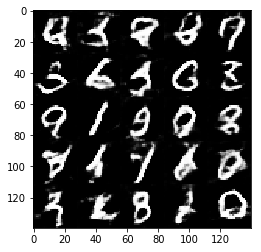

Epoch 2/2... Discriminator Loss: 1.8405... Generator Loss: 0.2560
Epoch 2/2... Discriminator Loss: 1.1538... Generator Loss: 1.4125
Epoch 2/2... Discriminator Loss: 0.9852... Generator Loss: 0.7704


In [125]:
batch_size = 128
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Input Stage
Generator Stage
(?, 28, 28, 3)
disciminator stage
(?, 14, 14, 64)
(?, 7, 7, 128)
disciminator stage
(?, 14, 14, 64)
(?, 7, 7, 128)
Epoch 1/1... Discriminator Loss: 1.0297... Generator Loss: 0.7776
Epoch 1/1... Discriminator Loss: 0.4888... Generator Loss: 1.4897
Epoch 1/1... Discriminator Loss: 0.4729... Generator Loss: 1.4606
Epoch 1/1... Discriminator Loss: 0.3626... Generator Loss: 1.7519
Epoch 1/1... Discriminator Loss: 0.5475... Generator Loss: 1.3044
Epoch 1/1... Discriminator Loss: 0.3720... Generator Loss: 1.7422
Epoch 1/1... Discriminator Loss: 0.4994... Generator Loss: 1.8178
Epoch 1/1... Discriminator Loss: 0.8608... Generator Loss: 1.1286
Epoch 1/1... Discriminator Loss: 0.7232... Generator Loss: 2.0904
Epoch 1/1... Discriminator Loss: 0.8829... Generator Loss: 0.7446
Generator Stage
(?, 28, 28, 3)


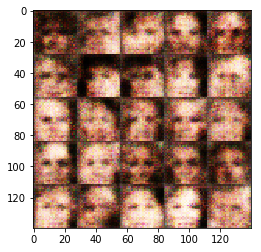

Epoch 1/1... Discriminator Loss: 0.6044... Generator Loss: 1.4116
Epoch 1/1... Discriminator Loss: 0.8218... Generator Loss: 1.4376
Epoch 1/1... Discriminator Loss: 0.6202... Generator Loss: 1.5068
Epoch 1/1... Discriminator Loss: 0.7669... Generator Loss: 1.2544
Epoch 1/1... Discriminator Loss: 0.6320... Generator Loss: 1.6579
Epoch 1/1... Discriminator Loss: 0.6467... Generator Loss: 1.9480
Epoch 1/1... Discriminator Loss: 0.9256... Generator Loss: 0.7799
Epoch 1/1... Discriminator Loss: 1.5602... Generator Loss: 0.3545
Epoch 1/1... Discriminator Loss: 1.1330... Generator Loss: 0.7775
Epoch 1/1... Discriminator Loss: 0.9781... Generator Loss: 1.4889
Generator Stage
(?, 28, 28, 3)


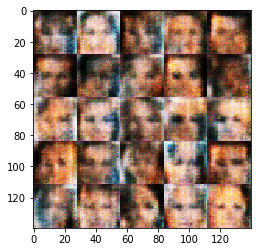

Epoch 1/1... Discriminator Loss: 0.9403... Generator Loss: 1.1547
Epoch 1/1... Discriminator Loss: 1.1435... Generator Loss: 1.3805
Epoch 1/1... Discriminator Loss: 1.1080... Generator Loss: 1.7949
Epoch 1/1... Discriminator Loss: 1.0181... Generator Loss: 0.9745
Epoch 1/1... Discriminator Loss: 0.9931... Generator Loss: 1.2774
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.5031
Epoch 1/1... Discriminator Loss: 1.2514... Generator Loss: 1.3910
Epoch 1/1... Discriminator Loss: 1.2481... Generator Loss: 0.9750
Epoch 1/1... Discriminator Loss: 1.2162... Generator Loss: 1.5176
Epoch 1/1... Discriminator Loss: 1.0649... Generator Loss: 1.1633
Generator Stage
(?, 28, 28, 3)


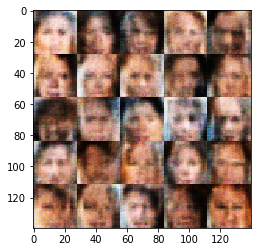

Epoch 1/1... Discriminator Loss: 0.9325... Generator Loss: 1.3000
Epoch 1/1... Discriminator Loss: 0.9014... Generator Loss: 1.1363
Epoch 1/1... Discriminator Loss: 1.1092... Generator Loss: 1.1697
Epoch 1/1... Discriminator Loss: 1.1585... Generator Loss: 0.7651
Epoch 1/1... Discriminator Loss: 0.9902... Generator Loss: 0.8347
Epoch 1/1... Discriminator Loss: 1.0219... Generator Loss: 0.8318
Epoch 1/1... Discriminator Loss: 0.7795... Generator Loss: 1.1308
Epoch 1/1... Discriminator Loss: 1.7676... Generator Loss: 0.2768
Epoch 1/1... Discriminator Loss: 0.9391... Generator Loss: 1.2520
Epoch 1/1... Discriminator Loss: 0.9214... Generator Loss: 0.8423
Generator Stage
(?, 28, 28, 3)


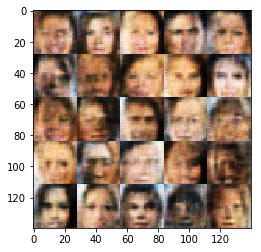

Epoch 1/1... Discriminator Loss: 0.9825... Generator Loss: 1.6071
Epoch 1/1... Discriminator Loss: 1.0897... Generator Loss: 0.7262
Epoch 1/1... Discriminator Loss: 1.1635... Generator Loss: 0.6345
Epoch 1/1... Discriminator Loss: 0.9272... Generator Loss: 0.8737
Epoch 1/1... Discriminator Loss: 1.4456... Generator Loss: 0.3833
Epoch 1/1... Discriminator Loss: 1.1613... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 1.0458... Generator Loss: 0.7737
Epoch 1/1... Discriminator Loss: 1.2931... Generator Loss: 1.0190
Epoch 1/1... Discriminator Loss: 1.0689... Generator Loss: 0.9960
Epoch 1/1... Discriminator Loss: 0.9450... Generator Loss: 1.3674
Generator Stage
(?, 28, 28, 3)


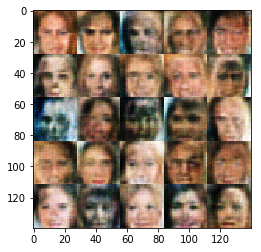

Epoch 1/1... Discriminator Loss: 0.9298... Generator Loss: 1.0384
Epoch 1/1... Discriminator Loss: 0.9231... Generator Loss: 1.0395
Epoch 1/1... Discriminator Loss: 1.4108... Generator Loss: 0.4400
Epoch 1/1... Discriminator Loss: 1.1011... Generator Loss: 0.7325
Epoch 1/1... Discriminator Loss: 2.1785... Generator Loss: 0.1750
Epoch 1/1... Discriminator Loss: 0.8214... Generator Loss: 1.3153
Epoch 1/1... Discriminator Loss: 0.9470... Generator Loss: 1.1452
Epoch 1/1... Discriminator Loss: 1.0352... Generator Loss: 0.6630
Epoch 1/1... Discriminator Loss: 0.9865... Generator Loss: 0.9966
Epoch 1/1... Discriminator Loss: 0.9918... Generator Loss: 1.0395
Generator Stage
(?, 28, 28, 3)


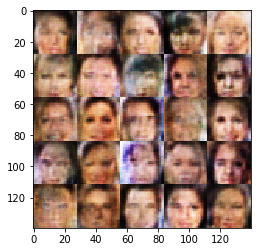

Epoch 1/1... Discriminator Loss: 1.7156... Generator Loss: 0.4359
Epoch 1/1... Discriminator Loss: 1.0881... Generator Loss: 0.8382
Epoch 1/1... Discriminator Loss: 1.1752... Generator Loss: 0.6439
Epoch 1/1... Discriminator Loss: 1.1981... Generator Loss: 0.7094
Epoch 1/1... Discriminator Loss: 1.1082... Generator Loss: 0.9111
Epoch 1/1... Discriminator Loss: 1.1602... Generator Loss: 0.9658
Epoch 1/1... Discriminator Loss: 1.1421... Generator Loss: 1.3292
Epoch 1/1... Discriminator Loss: 1.3452... Generator Loss: 0.4881
Epoch 1/1... Discriminator Loss: 1.1563... Generator Loss: 0.9760
Epoch 1/1... Discriminator Loss: 1.3321... Generator Loss: 0.5451
Generator Stage
(?, 28, 28, 3)


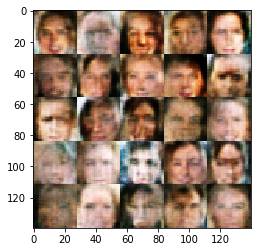

Epoch 1/1... Discriminator Loss: 1.1069... Generator Loss: 1.1022
Epoch 1/1... Discriminator Loss: 1.2125... Generator Loss: 1.0519
Epoch 1/1... Discriminator Loss: 1.4239... Generator Loss: 0.6855
Epoch 1/1... Discriminator Loss: 0.9952... Generator Loss: 0.9109
Epoch 1/1... Discriminator Loss: 1.1883... Generator Loss: 0.9383
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 0.6293
Epoch 1/1... Discriminator Loss: 1.3482... Generator Loss: 0.7097
Epoch 1/1... Discriminator Loss: 1.2623... Generator Loss: 0.9450
Epoch 1/1... Discriminator Loss: 1.2154... Generator Loss: 0.8890
Epoch 1/1... Discriminator Loss: 1.2844... Generator Loss: 0.6809
Generator Stage
(?, 28, 28, 3)


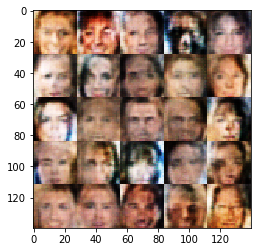

Epoch 1/1... Discriminator Loss: 1.2274... Generator Loss: 0.9985
Epoch 1/1... Discriminator Loss: 1.2370... Generator Loss: 0.6633
Epoch 1/1... Discriminator Loss: 1.2208... Generator Loss: 0.7657
Epoch 1/1... Discriminator Loss: 1.3564... Generator Loss: 0.5022
Epoch 1/1... Discriminator Loss: 1.1290... Generator Loss: 1.0090
Epoch 1/1... Discriminator Loss: 1.3587... Generator Loss: 0.7431
Epoch 1/1... Discriminator Loss: 1.1637... Generator Loss: 1.1523
Epoch 1/1... Discriminator Loss: 1.2622... Generator Loss: 0.9369
Epoch 1/1... Discriminator Loss: 1.4270... Generator Loss: 0.8131
Epoch 1/1... Discriminator Loss: 1.1919... Generator Loss: 0.7661
Generator Stage
(?, 28, 28, 3)


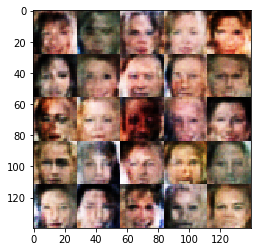

Epoch 1/1... Discriminator Loss: 1.4454... Generator Loss: 0.4837
Epoch 1/1... Discriminator Loss: 1.1551... Generator Loss: 0.7861
Epoch 1/1... Discriminator Loss: 1.2859... Generator Loss: 1.0066
Epoch 1/1... Discriminator Loss: 1.5927... Generator Loss: 0.5288
Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 0.9097
Epoch 1/1... Discriminator Loss: 1.1784... Generator Loss: 0.8720
Epoch 1/1... Discriminator Loss: 1.2569... Generator Loss: 0.6523
Epoch 1/1... Discriminator Loss: 1.2891... Generator Loss: 0.5932
Epoch 1/1... Discriminator Loss: 1.3006... Generator Loss: 0.9832
Epoch 1/1... Discriminator Loss: 1.2191... Generator Loss: 0.8168
Generator Stage
(?, 28, 28, 3)


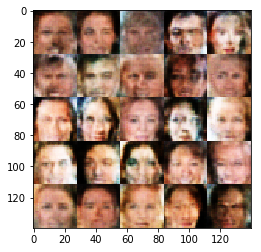

Epoch 1/1... Discriminator Loss: 1.2269... Generator Loss: 0.8201
Epoch 1/1... Discriminator Loss: 1.1360... Generator Loss: 0.7950
Epoch 1/1... Discriminator Loss: 1.1627... Generator Loss: 0.7621
Epoch 1/1... Discriminator Loss: 1.2865... Generator Loss: 0.6186
Epoch 1/1... Discriminator Loss: 1.2397... Generator Loss: 0.7015
Epoch 1/1... Discriminator Loss: 1.3186... Generator Loss: 0.9788
Epoch 1/1... Discriminator Loss: 1.1387... Generator Loss: 1.0001
Epoch 1/1... Discriminator Loss: 1.3223... Generator Loss: 0.5223
Epoch 1/1... Discriminator Loss: 1.2289... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 1.2325... Generator Loss: 0.7211
Generator Stage
(?, 28, 28, 3)


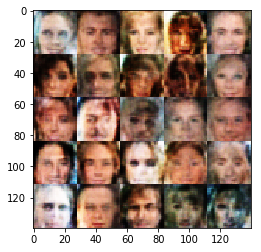

Epoch 1/1... Discriminator Loss: 1.3057... Generator Loss: 0.7941
Epoch 1/1... Discriminator Loss: 1.3184... Generator Loss: 1.0842
Epoch 1/1... Discriminator Loss: 1.2338... Generator Loss: 0.6100
Epoch 1/1... Discriminator Loss: 1.1752... Generator Loss: 0.9355
Epoch 1/1... Discriminator Loss: 1.3312... Generator Loss: 0.6082
Epoch 1/1... Discriminator Loss: 1.1736... Generator Loss: 0.7437
Epoch 1/1... Discriminator Loss: 1.3068... Generator Loss: 0.5796
Epoch 1/1... Discriminator Loss: 1.1855... Generator Loss: 0.7342
Epoch 1/1... Discriminator Loss: 1.2779... Generator Loss: 0.7226
Epoch 1/1... Discriminator Loss: 1.1411... Generator Loss: 0.9106
Generator Stage
(?, 28, 28, 3)


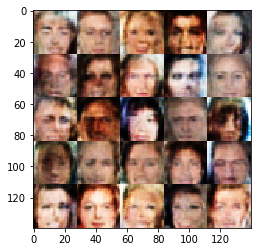

Epoch 1/1... Discriminator Loss: 1.2254... Generator Loss: 0.6450
Epoch 1/1... Discriminator Loss: 1.2365... Generator Loss: 0.7170
Epoch 1/1... Discriminator Loss: 1.1463... Generator Loss: 0.7728
Epoch 1/1... Discriminator Loss: 1.6281... Generator Loss: 0.3103
Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 0.8253
Epoch 1/1... Discriminator Loss: 1.2359... Generator Loss: 0.7173
Epoch 1/1... Discriminator Loss: 1.3393... Generator Loss: 1.1122
Epoch 1/1... Discriminator Loss: 1.2484... Generator Loss: 0.6367
Epoch 1/1... Discriminator Loss: 1.1696... Generator Loss: 1.0262
Epoch 1/1... Discriminator Loss: 1.3233... Generator Loss: 0.6645
Generator Stage
(?, 28, 28, 3)


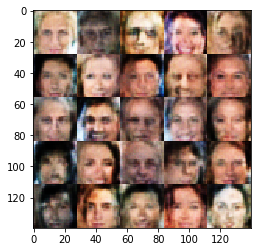

Epoch 1/1... Discriminator Loss: 1.3575... Generator Loss: 0.4596
Epoch 1/1... Discriminator Loss: 1.3736... Generator Loss: 0.4787
Epoch 1/1... Discriminator Loss: 1.1508... Generator Loss: 0.9550
Epoch 1/1... Discriminator Loss: 1.2169... Generator Loss: 1.0007
Epoch 1/1... Discriminator Loss: 1.0941... Generator Loss: 0.7814
Epoch 1/1... Discriminator Loss: 1.2034... Generator Loss: 1.0872
Epoch 1/1... Discriminator Loss: 1.1236... Generator Loss: 0.9468
Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 0.5355
Epoch 1/1... Discriminator Loss: 1.4061... Generator Loss: 1.4028
Epoch 1/1... Discriminator Loss: 1.1221... Generator Loss: 0.8309
Generator Stage
(?, 28, 28, 3)


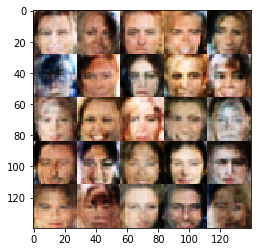

Epoch 1/1... Discriminator Loss: 1.2438... Generator Loss: 0.7386
Epoch 1/1... Discriminator Loss: 1.1690... Generator Loss: 0.8230
Epoch 1/1... Discriminator Loss: 1.3119... Generator Loss: 0.8722
Epoch 1/1... Discriminator Loss: 1.1481... Generator Loss: 0.7384
Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 0.5296
Epoch 1/1... Discriminator Loss: 1.1566... Generator Loss: 0.9244
Epoch 1/1... Discriminator Loss: 1.2934... Generator Loss: 0.8543
Epoch 1/1... Discriminator Loss: 1.3607... Generator Loss: 0.4341
Epoch 1/1... Discriminator Loss: 1.1648... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.2855... Generator Loss: 0.5814
Generator Stage
(?, 28, 28, 3)


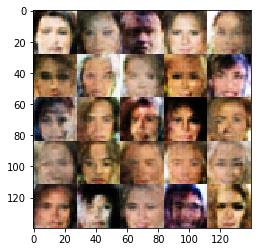

Epoch 1/1... Discriminator Loss: 1.2571... Generator Loss: 1.1058
Epoch 1/1... Discriminator Loss: 1.1133... Generator Loss: 1.1159
Epoch 1/1... Discriminator Loss: 1.1577... Generator Loss: 0.7718
Epoch 1/1... Discriminator Loss: 1.1763... Generator Loss: 0.8420
Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.9352
Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.5960
Epoch 1/1... Discriminator Loss: 1.2145... Generator Loss: 0.8104
Epoch 1/1... Discriminator Loss: 1.1576... Generator Loss: 0.7944
Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 1.2793
Epoch 1/1... Discriminator Loss: 1.3288... Generator Loss: 0.7595
Generator Stage
(?, 28, 28, 3)


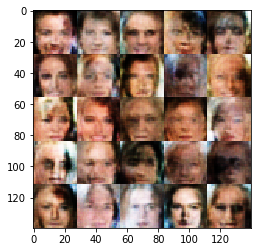

Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 0.7388
Epoch 1/1... Discriminator Loss: 1.2738... Generator Loss: 0.8982
Epoch 1/1... Discriminator Loss: 1.2937... Generator Loss: 0.8072
Epoch 1/1... Discriminator Loss: 1.3284... Generator Loss: 0.7577
Epoch 1/1... Discriminator Loss: 1.2551... Generator Loss: 0.7552
Epoch 1/1... Discriminator Loss: 1.2461... Generator Loss: 0.8968
Epoch 1/1... Discriminator Loss: 1.2979... Generator Loss: 0.5112
Epoch 1/1... Discriminator Loss: 1.2173... Generator Loss: 0.7099
Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 1.1212
Epoch 1/1... Discriminator Loss: 1.2332... Generator Loss: 1.0242
Generator Stage
(?, 28, 28, 3)


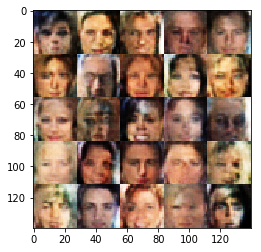

Epoch 1/1... Discriminator Loss: 1.3425... Generator Loss: 0.4998
Epoch 1/1... Discriminator Loss: 1.2907... Generator Loss: 0.8006
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 1.4752
Epoch 1/1... Discriminator Loss: 1.2498... Generator Loss: 0.8785
Epoch 1/1... Discriminator Loss: 1.2936... Generator Loss: 0.7916
Epoch 1/1... Discriminator Loss: 1.1151... Generator Loss: 1.2774
Epoch 1/1... Discriminator Loss: 1.2522... Generator Loss: 0.8546
Epoch 1/1... Discriminator Loss: 1.2837... Generator Loss: 0.5587
Epoch 1/1... Discriminator Loss: 1.4931... Generator Loss: 0.4816
Epoch 1/1... Discriminator Loss: 1.2546... Generator Loss: 0.9345
Generator Stage
(?, 28, 28, 3)


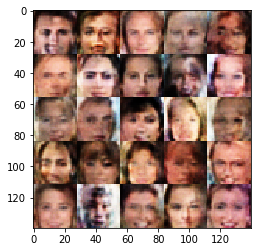

Epoch 1/1... Discriminator Loss: 1.0775... Generator Loss: 1.0258
Epoch 1/1... Discriminator Loss: 1.2391... Generator Loss: 0.7071
Epoch 1/1... Discriminator Loss: 1.2750... Generator Loss: 1.3317
Epoch 1/1... Discriminator Loss: 1.2340... Generator Loss: 0.6220
Epoch 1/1... Discriminator Loss: 1.3904... Generator Loss: 0.7527
Epoch 1/1... Discriminator Loss: 1.2139... Generator Loss: 0.9726
Epoch 1/1... Discriminator Loss: 1.2254... Generator Loss: 0.6996
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.5362
Epoch 1/1... Discriminator Loss: 1.0901... Generator Loss: 1.0947
Epoch 1/1... Discriminator Loss: 1.3135... Generator Loss: 0.8951
Generator Stage
(?, 28, 28, 3)


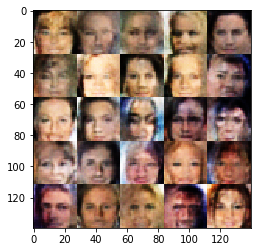

Epoch 1/1... Discriminator Loss: 1.2601... Generator Loss: 0.5707
Epoch 1/1... Discriminator Loss: 1.1522... Generator Loss: 0.7147
Epoch 1/1... Discriminator Loss: 1.1864... Generator Loss: 0.7670
Epoch 1/1... Discriminator Loss: 1.2932... Generator Loss: 0.7809
Epoch 1/1... Discriminator Loss: 1.1842... Generator Loss: 0.8862
Epoch 1/1... Discriminator Loss: 1.2507... Generator Loss: 0.7706
Epoch 1/1... Discriminator Loss: 1.7342... Generator Loss: 1.6431
Epoch 1/1... Discriminator Loss: 1.0245... Generator Loss: 1.0413
Epoch 1/1... Discriminator Loss: 1.2932... Generator Loss: 0.7117
Epoch 1/1... Discriminator Loss: 1.2146... Generator Loss: 0.6672
Generator Stage
(?, 28, 28, 3)


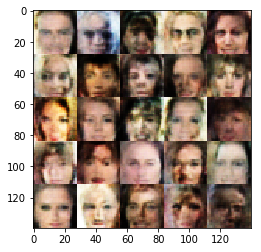

Epoch 1/1... Discriminator Loss: 1.2726... Generator Loss: 0.8047
Epoch 1/1... Discriminator Loss: 1.1855... Generator Loss: 0.9661
Epoch 1/1... Discriminator Loss: 1.3086... Generator Loss: 0.7663
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.5205
Epoch 1/1... Discriminator Loss: 1.0276... Generator Loss: 1.2612
Epoch 1/1... Discriminator Loss: 1.2589... Generator Loss: 0.7721
Epoch 1/1... Discriminator Loss: 1.2094... Generator Loss: 0.6975
Epoch 1/1... Discriminator Loss: 1.1978... Generator Loss: 0.8643
Epoch 1/1... Discriminator Loss: 1.5544... Generator Loss: 0.4288
Epoch 1/1... Discriminator Loss: 0.9912... Generator Loss: 1.1934
Generator Stage
(?, 28, 28, 3)


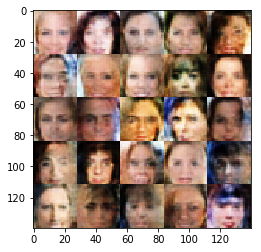

Epoch 1/1... Discriminator Loss: 1.1638... Generator Loss: 0.8343
Epoch 1/1... Discriminator Loss: 1.2701... Generator Loss: 0.7609
Epoch 1/1... Discriminator Loss: 1.1727... Generator Loss: 0.7121
Epoch 1/1... Discriminator Loss: 1.1513... Generator Loss: 0.9428
Epoch 1/1... Discriminator Loss: 1.2707... Generator Loss: 0.5119
Epoch 1/1... Discriminator Loss: 1.3641... Generator Loss: 0.6877
Epoch 1/1... Discriminator Loss: 1.2309... Generator Loss: 0.9414
Epoch 1/1... Discriminator Loss: 1.4752... Generator Loss: 0.4133
Epoch 1/1... Discriminator Loss: 1.6168... Generator Loss: 0.4357
Epoch 1/1... Discriminator Loss: 1.1429... Generator Loss: 0.8910
Generator Stage
(?, 28, 28, 3)


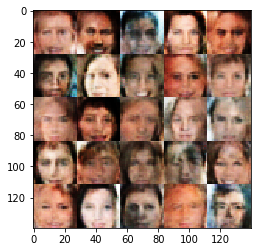

Epoch 1/1... Discriminator Loss: 1.2623... Generator Loss: 0.8965
Epoch 1/1... Discriminator Loss: 1.2817... Generator Loss: 0.5997
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.9610
Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.6001
Epoch 1/1... Discriminator Loss: 1.3221... Generator Loss: 0.6134
Epoch 1/1... Discriminator Loss: 1.2093... Generator Loss: 0.7348
Epoch 1/1... Discriminator Loss: 1.2189... Generator Loss: 0.6856
Epoch 1/1... Discriminator Loss: 1.2525... Generator Loss: 0.8629
Epoch 1/1... Discriminator Loss: 1.0290... Generator Loss: 1.0582
Epoch 1/1... Discriminator Loss: 0.8456... Generator Loss: 1.3052
Generator Stage
(?, 28, 28, 3)


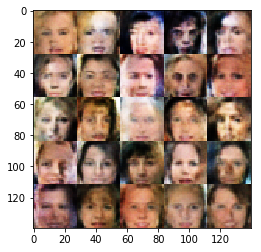

Epoch 1/1... Discriminator Loss: 1.1488... Generator Loss: 0.8274
Epoch 1/1... Discriminator Loss: 1.2680... Generator Loss: 0.5886
Epoch 1/1... Discriminator Loss: 1.2803... Generator Loss: 0.8076
Epoch 1/1... Discriminator Loss: 1.1320... Generator Loss: 0.8040
Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 1.0560
Epoch 1/1... Discriminator Loss: 1.1035... Generator Loss: 0.8908
Epoch 1/1... Discriminator Loss: 1.2296... Generator Loss: 0.7014
Epoch 1/1... Discriminator Loss: 1.2884... Generator Loss: 1.0745
Epoch 1/1... Discriminator Loss: 1.1956... Generator Loss: 0.6198
Epoch 1/1... Discriminator Loss: 0.9594... Generator Loss: 0.8981
Generator Stage
(?, 28, 28, 3)


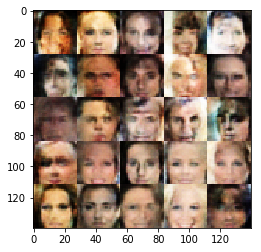

Epoch 1/1... Discriminator Loss: 1.0181... Generator Loss: 1.1848
Epoch 1/1... Discriminator Loss: 1.1717... Generator Loss: 0.7212
Epoch 1/1... Discriminator Loss: 1.1393... Generator Loss: 1.4155
Epoch 1/1... Discriminator Loss: 1.2043... Generator Loss: 1.3564
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.9804
Epoch 1/1... Discriminator Loss: 1.3344... Generator Loss: 0.5925
Epoch 1/1... Discriminator Loss: 1.2898... Generator Loss: 0.6257
Epoch 1/1... Discriminator Loss: 1.1625... Generator Loss: 0.9266
Epoch 1/1... Discriminator Loss: 1.1932... Generator Loss: 0.5786
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.5228
Generator Stage
(?, 28, 28, 3)


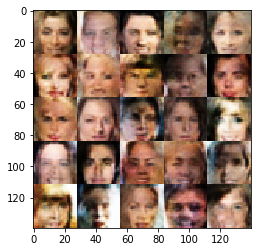

Epoch 1/1... Discriminator Loss: 1.1752... Generator Loss: 0.8853
Epoch 1/1... Discriminator Loss: 1.2603... Generator Loss: 0.6117
Epoch 1/1... Discriminator Loss: 1.1498... Generator Loss: 1.1070
Epoch 1/1... Discriminator Loss: 1.2261... Generator Loss: 0.6760
Epoch 1/1... Discriminator Loss: 1.2761... Generator Loss: 0.8845
Epoch 1/1... Discriminator Loss: 1.2513... Generator Loss: 1.0915
Epoch 1/1... Discriminator Loss: 1.2412... Generator Loss: 0.8043
Epoch 1/1... Discriminator Loss: 1.3026... Generator Loss: 0.6332
Epoch 1/1... Discriminator Loss: 1.5079... Generator Loss: 0.3791
Epoch 1/1... Discriminator Loss: 1.5289... Generator Loss: 0.4059
Generator Stage
(?, 28, 28, 3)


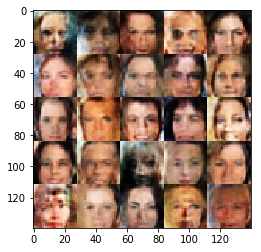

Epoch 1/1... Discriminator Loss: 1.2567... Generator Loss: 0.6640
Epoch 1/1... Discriminator Loss: 1.2039... Generator Loss: 0.9300
Epoch 1/1... Discriminator Loss: 1.1896... Generator Loss: 0.7863
Epoch 1/1... Discriminator Loss: 1.2904... Generator Loss: 0.8044
Epoch 1/1... Discriminator Loss: 1.1745... Generator Loss: 0.7269
Epoch 1/1... Discriminator Loss: 1.1793... Generator Loss: 0.9457
Epoch 1/1... Discriminator Loss: 1.1684... Generator Loss: 0.7619
Epoch 1/1... Discriminator Loss: 1.1542... Generator Loss: 0.8170
Epoch 1/1... Discriminator Loss: 1.1341... Generator Loss: 1.0034
Epoch 1/1... Discriminator Loss: 1.2109... Generator Loss: 0.7203
Generator Stage
(?, 28, 28, 3)


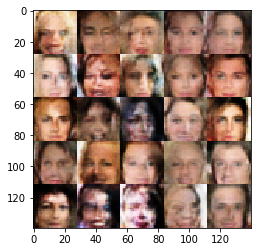

Epoch 1/1... Discriminator Loss: 1.2319... Generator Loss: 0.7136
Epoch 1/1... Discriminator Loss: 1.4464... Generator Loss: 0.5295
Epoch 1/1... Discriminator Loss: 1.5391... Generator Loss: 0.5151
Epoch 1/1... Discriminator Loss: 1.1759... Generator Loss: 0.8984
Epoch 1/1... Discriminator Loss: 1.2361... Generator Loss: 0.9664
Epoch 1/1... Discriminator Loss: 1.2826... Generator Loss: 0.6789
Epoch 1/1... Discriminator Loss: 1.2545... Generator Loss: 0.7476
Epoch 1/1... Discriminator Loss: 1.2042... Generator Loss: 0.6259
Epoch 1/1... Discriminator Loss: 1.2292... Generator Loss: 0.8515
Epoch 1/1... Discriminator Loss: 1.2028... Generator Loss: 0.6997
Generator Stage
(?, 28, 28, 3)


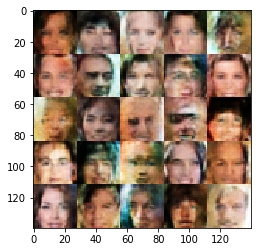

Epoch 1/1... Discriminator Loss: 1.4722... Generator Loss: 0.6060
Epoch 1/1... Discriminator Loss: 1.2490... Generator Loss: 0.6771
Epoch 1/1... Discriminator Loss: 1.1706... Generator Loss: 0.6991
Epoch 1/1... Discriminator Loss: 1.2617... Generator Loss: 0.9401
Epoch 1/1... Discriminator Loss: 1.1654... Generator Loss: 1.0398
Epoch 1/1... Discriminator Loss: 1.0666... Generator Loss: 0.9935
Epoch 1/1... Discriminator Loss: 1.2435... Generator Loss: 0.8387
Epoch 1/1... Discriminator Loss: 0.9752... Generator Loss: 0.9674
Epoch 1/1... Discriminator Loss: 1.2734... Generator Loss: 0.8559
Epoch 1/1... Discriminator Loss: 1.2941... Generator Loss: 1.0083
Generator Stage
(?, 28, 28, 3)


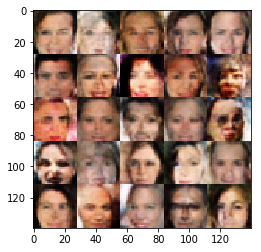

Epoch 1/1... Discriminator Loss: 1.2119... Generator Loss: 0.9206
Epoch 1/1... Discriminator Loss: 1.0596... Generator Loss: 0.9428
Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.5452
Epoch 1/1... Discriminator Loss: 1.3094... Generator Loss: 0.6854
Epoch 1/1... Discriminator Loss: 1.3213... Generator Loss: 0.6198
Epoch 1/1... Discriminator Loss: 1.1085... Generator Loss: 0.9678
Epoch 1/1... Discriminator Loss: 1.1687... Generator Loss: 1.0767
Epoch 1/1... Discriminator Loss: 1.2807... Generator Loss: 0.6966
Epoch 1/1... Discriminator Loss: 1.3059... Generator Loss: 0.8647
Epoch 1/1... Discriminator Loss: 1.3344... Generator Loss: 0.5164
Generator Stage
(?, 28, 28, 3)


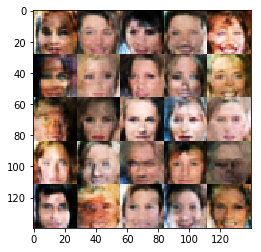

Epoch 1/1... Discriminator Loss: 1.2836... Generator Loss: 0.9381
Epoch 1/1... Discriminator Loss: 1.2871... Generator Loss: 0.6159
Epoch 1/1... Discriminator Loss: 1.3085... Generator Loss: 1.2050
Epoch 1/1... Discriminator Loss: 1.3528... Generator Loss: 0.5932
Epoch 1/1... Discriminator Loss: 1.0737... Generator Loss: 0.7464
Epoch 1/1... Discriminator Loss: 1.1330... Generator Loss: 0.9182
Epoch 1/1... Discriminator Loss: 1.2130... Generator Loss: 0.6512
Epoch 1/1... Discriminator Loss: 1.1034... Generator Loss: 1.1673
Epoch 1/1... Discriminator Loss: 1.1547... Generator Loss: 0.8844
Epoch 1/1... Discriminator Loss: 1.2316... Generator Loss: 1.2729
Generator Stage
(?, 28, 28, 3)


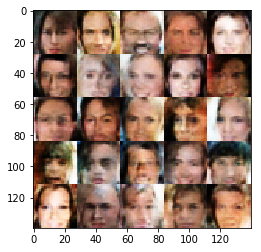

Epoch 1/1... Discriminator Loss: 1.2409... Generator Loss: 0.6376
Epoch 1/1... Discriminator Loss: 1.2377... Generator Loss: 0.6852
Epoch 1/1... Discriminator Loss: 1.2737... Generator Loss: 0.6290
Epoch 1/1... Discriminator Loss: 1.0707... Generator Loss: 1.0412
Epoch 1/1... Discriminator Loss: 1.4171... Generator Loss: 0.6010
Epoch 1/1... Discriminator Loss: 1.0832... Generator Loss: 0.6344


In [132]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.